<a href="https://colab.research.google.com/github/raamiiChu/111-1_NCCU_DCT_3D_Game_Programming_G2/blob/main/0418_%E4%BD%9C%E6%A5%AD/gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 讀入訓練好的 model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業/'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/數學軟體應用/作業/0418 作業


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet_v2 import preprocess_input

model = load_model('myna_model')

## 2. 用 `gradio` 打造八哥辨識 web app!

#### 下載 gradio 

In [ ]:
!pip install gradio

     |████████████████████████████████| 2.9 MB 5.3 MB/s 
     |████████████████████████████████| 212 kB 51.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 2.0 MB 38.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 253 kB 70.0 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 1.1 MB 52.8 MB/s 
     |████████████████████████████████| 271 kB 55.8 MB/s 
     |████████████████████████████████| 144 kB 40.9 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 10.9 MB 46.1 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 61 kB 450 kB/s 
     |████████████████████████████████| 856 kB 61.1 MB/s 
     |████████████████████████

#### 程式碼

In [ ]:
import gradio as gr

/usr/local/lib/python3.7/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
labels = ["土八哥", "白尾八哥", "家八哥"]

In [ ]:
def classify_image(inp):
  inp = inp.reshape((-1, 256, 256, 3))
  inp = preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(3)}

image = gr.inputs.Image(shape=(256, 256), label="八哥照片")
label = gr.outputs.Label(num_top_classes=3, label="AI辨識結果")

In [ ]:
gr.Interface(fn=classify_image, inputs=image, outputs=label,
             title="AI 八哥辨識機",
             description="我能辨識台灣常見的三種八哥: (土)八哥、家八哥、白尾八哥。快找張八哥照片來考我吧!",
             capture_session=True).launch()

/usr/local/lib/python3.7/dist-packages/gradio/interface.py:248: UserWarning: The `capture_session` parameter in the `Interface` is deprecated and may be removed in the future.
  "The `capture_session` parameter in the `Interface`"


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://33170.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f7e85348710>,
 'http://127.0.0.1:7860/',
 'https://33170.gradio.app')

#### 運行結果截圖

##### 家八哥

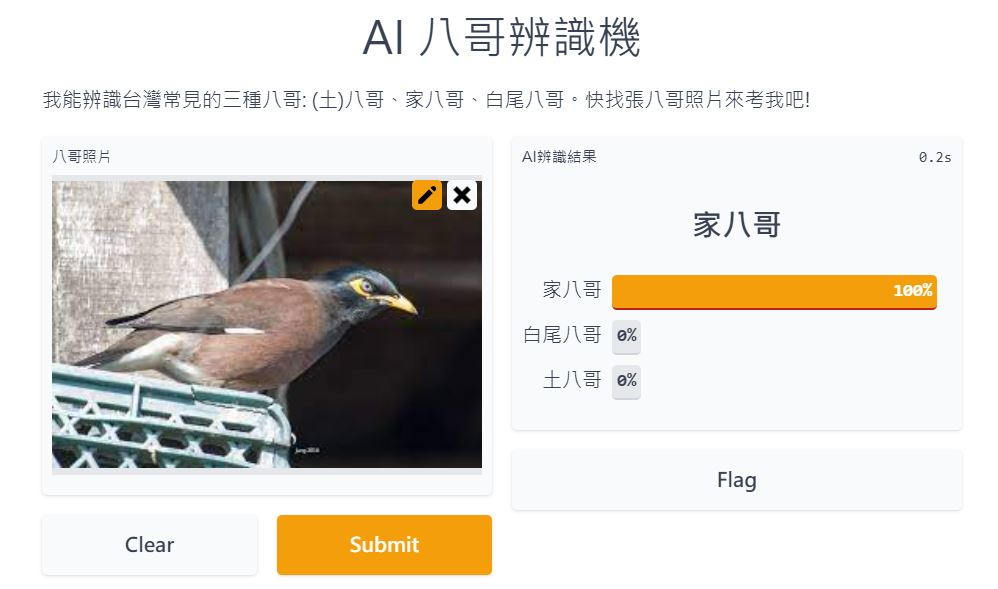
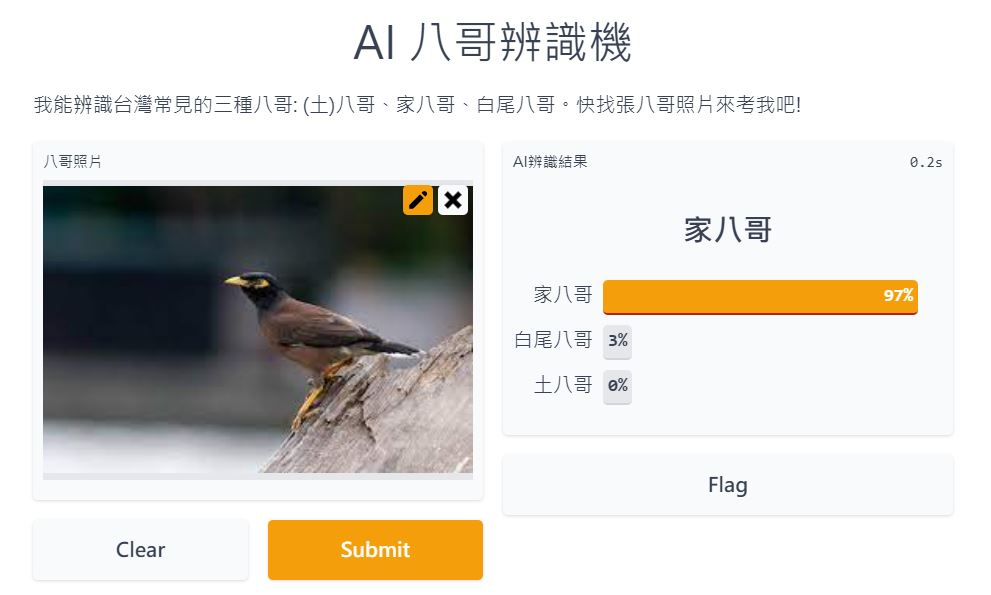
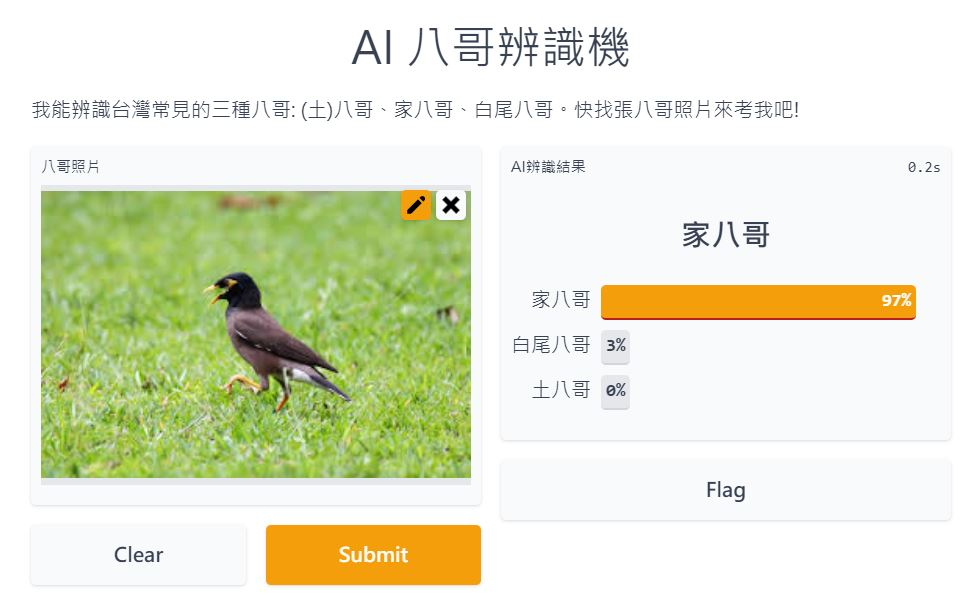

##### 土八哥

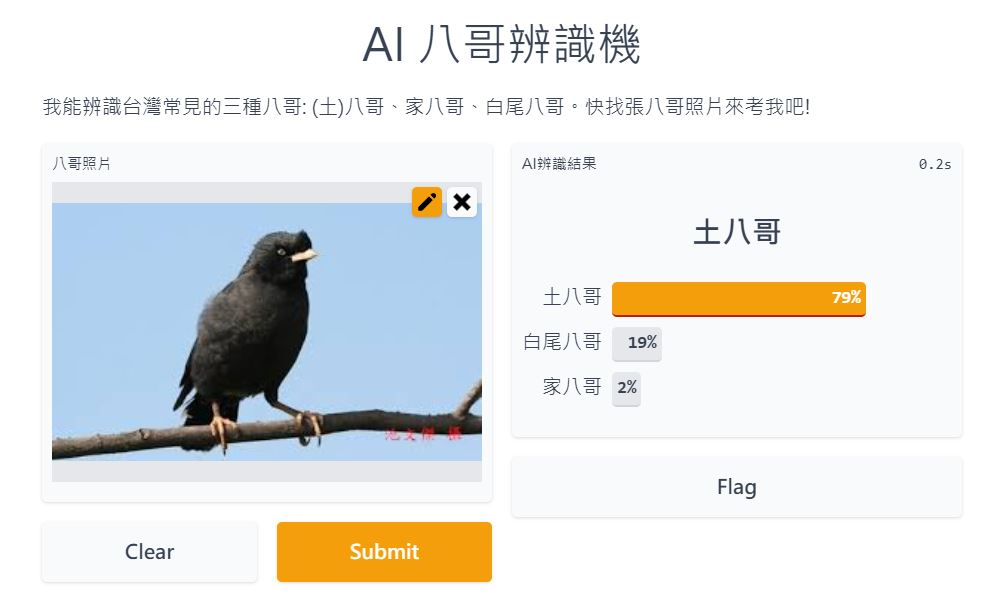
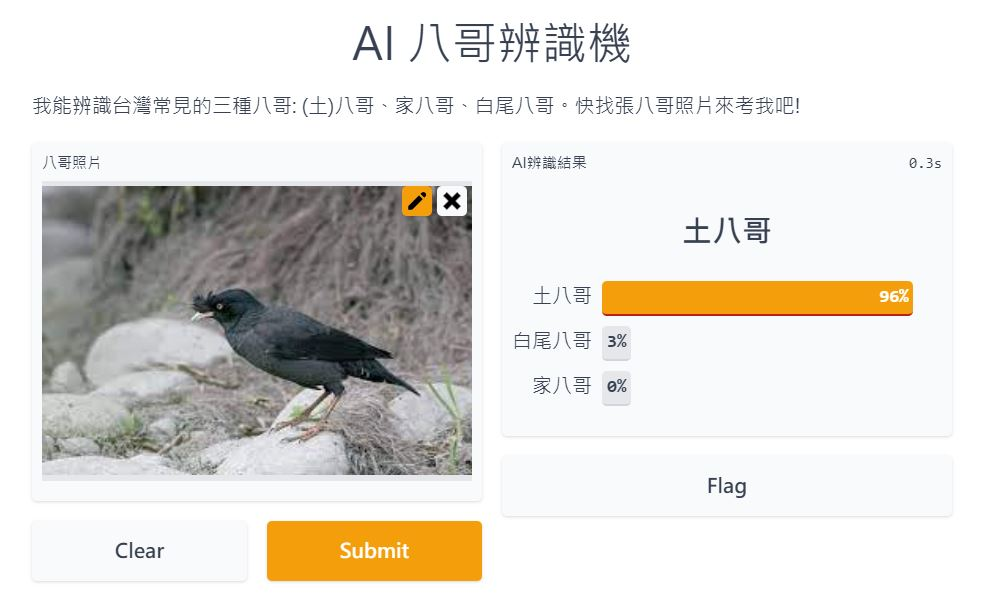
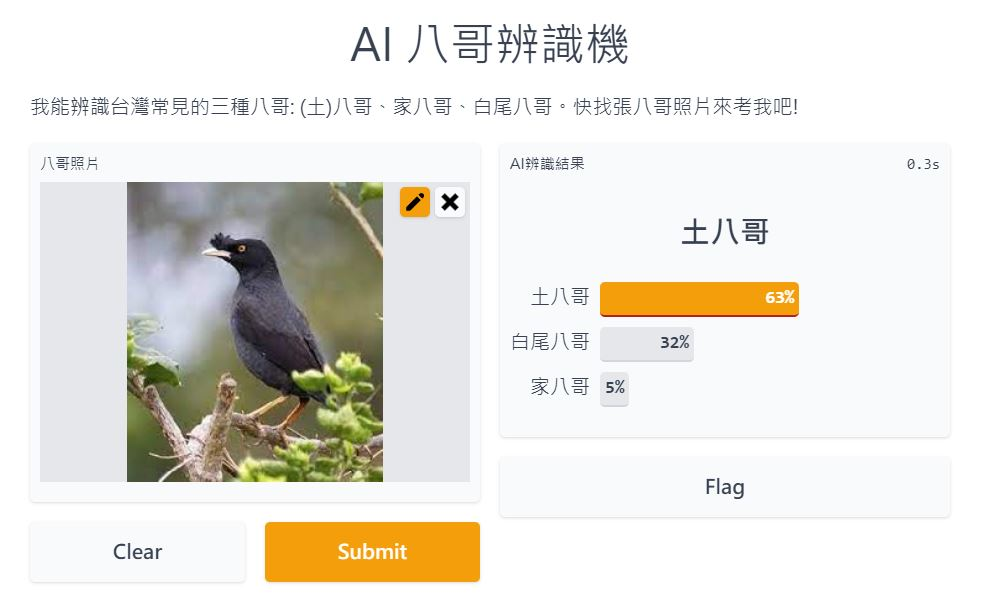

##### 白尾八哥

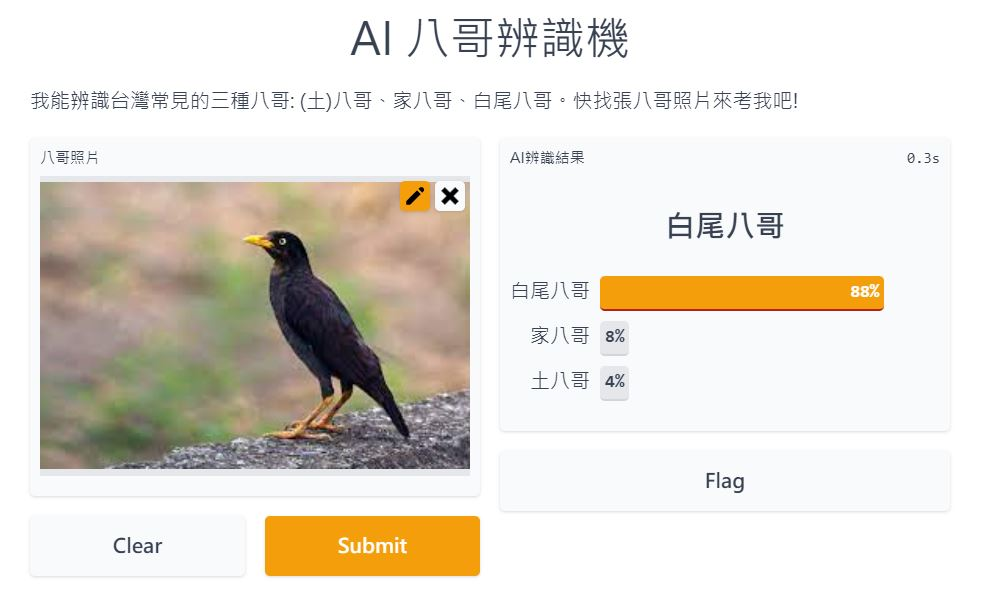
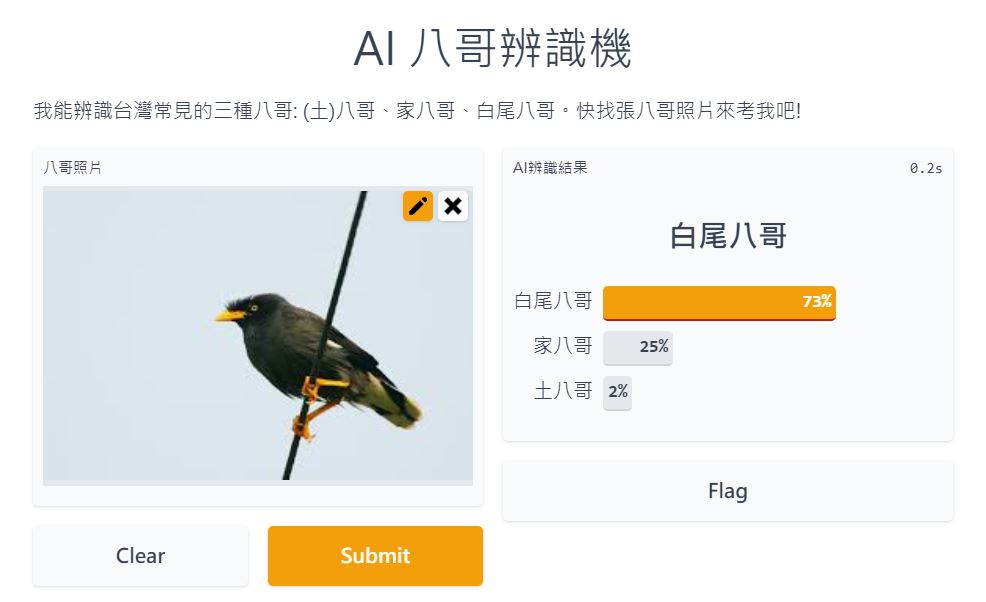
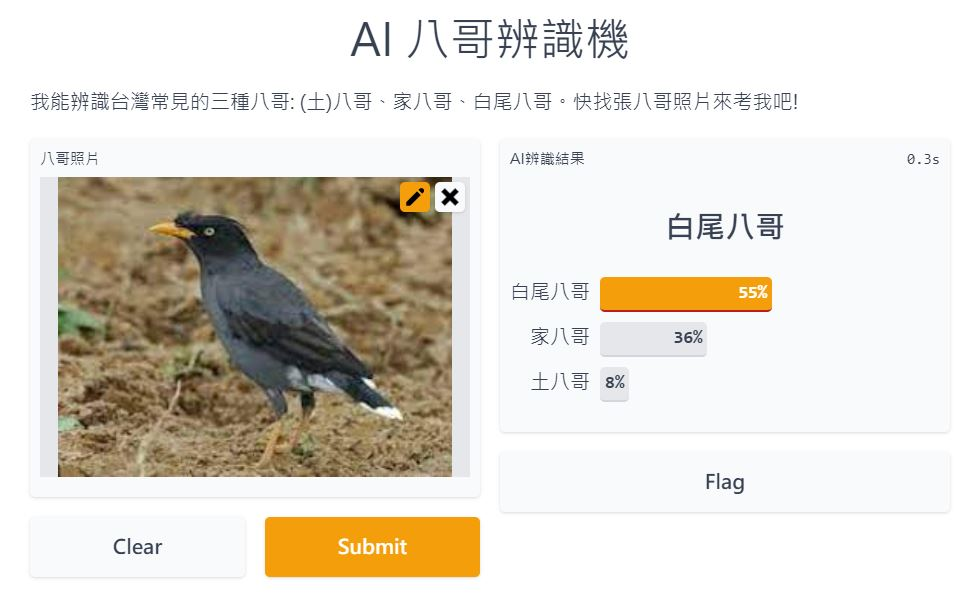